In [2]:
import pandas as pd
from scipy.stats import mannwhitneyu
import scipy.stats as stats
import seaborn as sns

In [295]:
#df_hic_auc = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr.csv', sep='\t')
df_hic_auc = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/inter_only/hic_gene_none_inter_1_percent_per_chr_mouse_aggregates_10kbp_raw.csv', sep='\t')




list (df_hic_auc_1.columns)

In [267]:
df_hic_auc_2 = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_mouse/aggregates/10kbp_raw/max/inter_only/hic_gene_none_inter_10_percent_per_chr_human_aggregates_10kbp_raw.csv', sep='\t', skiprows=1, names=['gene_id_exp_file','chrom_exp_file','gene_id_jac_sim','chrom_jac_sim','auc'])



In [268]:
df_hic_auc = df_hic_auc_1.merge(df_hic_auc_2 , on=['gene_id_exp_file','chrom_exp_file','gene_id_jac_sim','chrom_jac_sim'])


In [269]:
df_hic_auc['auc'] = ( df_hic_auc['auc_x'] + df_hic_auc['auc_y'] ) / 2

In [296]:
df_ensg_name = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/ensg_geneid_symbol.csv', sep='\t')[['GeneID', 'Ensembl_gene_identifier', 'Symbol', 'type_of_gene']]



df_ensg_name = df_ensg_name.drop_duplicates(['Ensembl_gene_identifier', 'Symbol'])

df_ensg_name = df_ensg_name.drop_duplicates(['Ensembl_gene_identifier'])
df_ensg_name = df_ensg_name.drop_duplicates(['Symbol'])


In [238]:
df_essential_genes = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/HA_2014_essential.txt', sep='\t', names=['Symbol'])

df_ensg_name['essential'] = [1 if x in df_essential_genes['Symbol'].tolist() else 0 for x in df_ensg_name['Symbol']]


In [209]:
df_hk_genes = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/hk_genes/HK_genes.txt', sep='\t', names=['Symbol', '_id'])

df_hk_genes['Symbol'] = [x.strip() for x in df_hk_genes['Symbol'] ]

df_ensg_name['hk'] = [1 if x in df_hk_genes['Symbol'].tolist() else 0 for x in df_ensg_name['Symbol']]

In [210]:
cancer_genes = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/cancer_genes/cosmic_cancer.tsv', sep='\t')



df_ensg_name['cancer'] = [1 if x in cancer_genes['Gene Symbol'].tolist() else 0 for x in df_ensg_name['Symbol']]

In [211]:
df_rna_binding = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/rna_binding_proteins/41576_2014_BFnrg3813_MOESM25_ESM/RBP table-Table 1.tsv', sep='\t')



df_ensg_name['rna_binding'] = [1 if x in df_rna_binding['gene name'].tolist() else 0 for x in df_ensg_name['Symbol']]



In [297]:
df_ensg_name = df_ensg_name.merge(df_hic_auc, left_on =['Ensembl_gene_identifier'], right_on=['gene_id_jac_sim'])


In [213]:
for property_type in ['essential', 'hk', 'cancer', 'rna_binding']:

    t_p_scores = df_ensg_name[df_ensg_name[property_type] ==1 ]['auc'].tolist()
    t_n_scores = df_ensg_name[df_ensg_name[property_type] ==0 ]['auc'].tolist()
    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
    print (property_type, U1, p_val)

essential 1670391.0 0.04283021270437098
hk 16161789.0 0.006918904129588146
cancer 3350857.0 0.9996597344624272
rna_binding 7416773.5 0.6631232200196036


<AxesSubplot:xlabel='hk', ylabel='auc'>

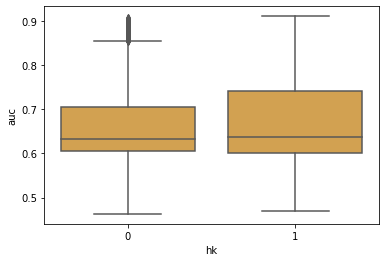

In [214]:
sns.boxplot(data=df_ensg_name, x='hk', y='auc', palette=['#E8A63B'])

In [46]:
for given_type in ['protein-coding','pseudo', 'ncRNA','other','tRNA','rRNA','scRNA','snoRNA','snRNA']:
    t_p_scores = df_ensg_name[df_ensg_name['type_of_gene'] == given_type ]['auc'].tolist()
    t_n_scores = df_ensg_name[df_ensg_name['type_of_gene'] != given_type ]['auc'].tolist()
    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
    print (U1, p_val, given_type)
    

0.0 nan protein-coding
0.0 nan pseudo
0.0 nan ncRNA
0.0 nan other
0.0 nan tRNA
0.0 nan rRNA
0.0 nan scRNA
0.0 nan snoRNA
0.0 nan snRNA


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


In [230]:
exp_genes = pd.read_csv("/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/Homo_sapiens_average_rank.csv")

exp_genes['genes'] = [x.split('.')[0] for x in exp_genes['genes']]

exp_genes.set_index('genes', inplace=True)

exp_genes['avg_rank'] = exp_genes.sum(axis=1)

exp_genes['avg_rank'] = [ x/ exp_genes.shape[1] for x in  exp_genes['avg_rank']]

exp_genes = exp_genes[['avg_rank']]

exp_genes.reset_index(inplace=True)

exp_genes.drop_duplicates(['genes'], inplace=True)


In [231]:
df_hic_auc_expression = df_hic_auc.merge(exp_genes, left_on='gene_id_jac_sim', right_on='genes')

<AxesSubplot:xlabel='auc_d', ylabel='avg_rank'>

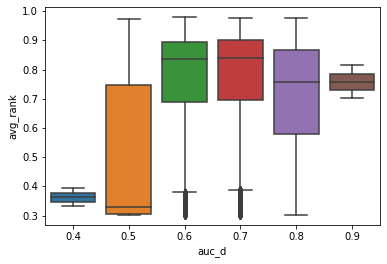

In [232]:
df_hic_auc_expression['auc_d'] = df_hic_auc_expression['auc'].round(1)
df_hic_auc_expression['avg_rank_d'] = df_hic_auc_expression['avg_rank'].round(1)
sns.boxplot(data=df_hic_auc_expression, y='avg_rank', x='auc_d')

In [298]:
df_de_prior = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/mc_predictability/pnas.1802973116.sd02.txt', sep='\t')



df_de_prior = df_ensg_name.merge(df_de_prior, left_on='Symbol', right_on='Gene_Name')

#df_hic_de_prior = df_hic_auc.merge(df1, left_on='gene_id_jac_sim', right_on='Ensembl_gene_identifier' )

#sns.regplot(data=df1, y='DE_Prior_Rank', x='auc')



<AxesSubplot:xlabel='auc_d', ylabel='DE_Prior_Rank'>

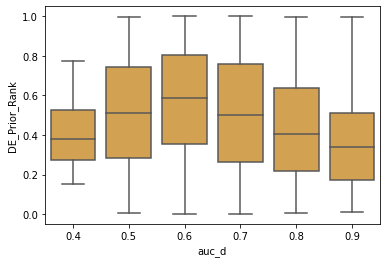

In [299]:
df_de_prior['auc_d'] = df_de_prior['auc'].round(1)
df_de_prior['DE_Prior_Rank_d'] = df_de_prior['DE_Prior_Rank'].round(1)

sns.boxplot(data=df_de_prior, y='DE_Prior_Rank', x='auc_d', palette=['#E8A63B'])

In [29]:
human_mouse_dn_ds = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/human_mouse_dn_ds.txt', sep='\t', names=['gene_id', '_g', 'dn', 'ds', '-', '--', '---', 'd'])



human_mouse_dn_ds = human_mouse_dn_ds.dropna(subset=['dn', 'ds'])

human_mouse_dn_ds['ratio'] = human_mouse_dn_ds['dn'] /  human_mouse_dn_ds['ds'] 

map_gene_uni = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene_ages/gene_to_uniprot_human.txt', sep='\t', names=['gene_id', 'uniprot_id'])

map_gene_uni.dropna(inplace=True)

map_gene_uni.drop_duplicates(inplace=True)
gene_age = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene_ages/main_HUMAN.csv')
uni_list = gene_age['Unnamed: 0'].tolist()

map_gene_uni = map_gene_uni[map_gene_uni['uniprot_id'].isin(uni_list)]

#map_gene_uni = map_gene_uni[map_gene_uni['gene_id'].isin(auc_values_1['gene_id_jac_sim'].tolist())]

map_gene_uni.drop_duplicates(subset='uniprot_id', inplace=True)
map_gene_uni.drop_duplicates(subset='gene_id', inplace=True)

df_con_age = map_gene_uni.merge(gene_age, left_on='uniprot_id', right_on='Unnamed: 0')

df_uni = df_con_age.merge(df_hic_auc, left_on='gene_id', right_on=['gene_id_jac_sim'])
dict_gene_age = {'Cellular_organisms':0, 'Euk_Archaea':1, 'Euk+Bac':2,'Eukaryota':3, 'Opisthokonta':4, 'Eumetazoa':5, 'Vertebrata':6, 'Mammalia':7}
df_uni['disc_age'] = [dict_gene_age[x] for x in df_uni['modeAge']]

df_auc_dn_ds = human_mouse_dn_ds.merge(df_hic_auc, left_on='gene_id', right_on='gene_id_jac_sim')


<AxesSubplot:xlabel='disc_age', ylabel='auc'>

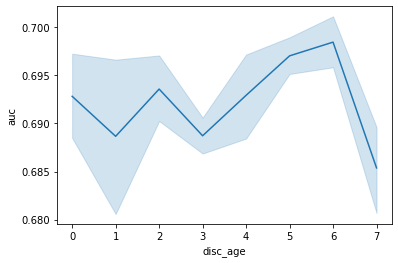

In [30]:
df_uni['auc_d'] = df_uni['auc'].round(1)

sns.lineplot(data=df_uni, y='auc', x='disc_age')

In [76]:
df_hic_auc = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/max/intra_only/hic_gene_KR_intra_1_percent_per_chr.csv', sep='\t')

df_regulated_genes = pd.read_csv('/grid/gillis/data/lohia/eQTL/GTEx_Analysis_v8_eQTL/sig_association.csv.gz', sep='\t')
df_regulated_genes['count'] = 1

df_regulated_genes['tss_distance'] = df_regulated_genes['tss_distance'].abs()

df_regulated_genes['gene_id'] = [x.split('.')[0] for x in df_regulated_genes['gene_id']]

df_regulated_genes = df_regulated_genes.groupby(['gene_id'])['count'].sum().reset_index()

dk = df_regulated_genes.merge(df_hic_auc, left_on='gene_id', right_on='gene_id_jac_sim')





<AxesSubplot:xlabel='auc_d', ylabel='count'>

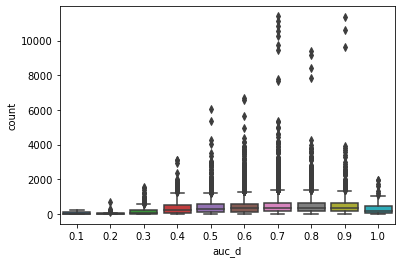

In [77]:
dk['auc_d'] = dk['auc'].round(1)

sns.boxplot(data=dk, y='count', x='auc_d')